In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from utils.loader import FactoryLoader
from utils.ml import MLPipeline
from utils.preprocessing import PreprocessingFactory
from utils.feature_extraction import *
from utils.utils import *

VAL_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val"
TRAIN_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train"

In [2]:
percent = 100
random = False

# Initialize the FactoryLoader
factory = PreprocessingFactory()
factory.gaussian_smoothing(5)
factory.clahe()
factory.normalize2float()
factory.pad2square()
factory.resize((150,150))

factory_loader = FactoryLoader(path=VAL_PATH, batch_size=32, factory=factory, percentage=percent, shuffle=random)

# Create the feature extraction pipeline strategy and add desired features
strategy = FeatureExtractionStrategy()

strategy.add_extractor(MeanExtractor())  # Add mean feature
strategy.add_extractor(StdExtractor())   # Add standard deviation feature
strategy.add_extractor(VarExtractor())   # Add variance feature

strategy.add_extractor(MeanExtractor("lab"))   # Add mean feature
strategy.add_extractor(StdExtractor("lab"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("lab"))   # Add variance feature

strategy.add_extractor(MeanExtractor("hsv"))   # Add mean feature
strategy.add_extractor(StdExtractor("hsv"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("hsv"))   # Add variance feature

strategy.add_extractor(LBPExtractor(radius=1, n_points=8))
strategy.add_extractor(LBPExtractor(radius=1, n_points=16))

strategy.add_extractor(GLCMExtractor(properties=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation',]))

pipeline = MLPipeline(dataset_path=TRAIN_PATH, preprocessing_factory=factory, feature_strategy=strategy, classifiers=[], percentage=percent, verbose=True, shuffle=random)

INFO:utils.ml:MLPipeline initialized with dataset path: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train
INFO:utils.ml:Preprocessing steps


In [3]:
pipeline.loader.get_transformation_steps()

{'smoothing': {'kernel_size': 5},
 'clahe': {'clip_limit': 2.0, 'tile_grid_size': (8, 8)},
 '01_norm': {},
 'pad2square': {'fill': nan},
 'resize': {'size': (150, 150)}}

In [4]:
pipeline.get_feature_names()

['mean_rgb_channel_0',
 'mean_rgb_channel_1',
 'mean_rgb_channel_2',
 'std_rgb_channel_0',
 'std_rgb_channel_1',
 'std_rgb_channel_2',
 'var_rgb_channel_0',
 'var_rgb_channel_1',
 'var_rgb_channel_2',
 'mean_lab_channel_0',
 'mean_lab_channel_1',
 'mean_lab_channel_2',
 'std_lab_channel_0',
 'std_lab_channel_1',
 'std_lab_channel_2',
 'var_lab_channel_0',
 'var_lab_channel_1',
 'var_lab_channel_2',
 'mean_hsv_channel_0',
 'mean_hsv_channel_1',
 'mean_hsv_channel_2',
 'std_hsv_channel_0',
 'std_hsv_channel_1',
 'std_hsv_channel_2',
 'var_hsv_channel_0',
 'var_hsv_channel_1',
 'var_hsv_channel_2',
 'lbp_rad1_bins8_0',
 'lbp_rad1_bins8_1',
 'lbp_rad1_bins8_2',
 'lbp_rad1_bins8_3',
 'lbp_rad1_bins8_4',
 'lbp_rad1_bins8_5',
 'lbp_rad1_bins8_6',
 'lbp_rad1_bins8_7',
 'lbp_rad1_bins8_8',
 'lbp_rad1_bins8_9',
 'lbp_rad1_bins16_0',
 'lbp_rad1_bins16_1',
 'lbp_rad1_bins16_2',
 'lbp_rad1_bins16_3',
 'lbp_rad1_bins16_4',
 'lbp_rad1_bins16_5',
 'lbp_rad1_bins16_6',
 'lbp_rad1_bins16_7',
 'lbp_rad1_

In [5]:
pipeline.run_feature_extraction()

INFO:utils.ml:Running feature extraction...


Processed 5/634 batches.
Processed 10/634 batches.
Processed 15/634 batches.
Processed 20/634 batches.
Processed 25/634 batches.
Processed 30/634 batches.
Processed 35/634 batches.
Processed 40/634 batches.
Processed 45/634 batches.
Processed 50/634 batches.
Processed 55/634 batches.
Processed 60/634 batches.
Processed 65/634 batches.
Processed 70/634 batches.
Processed 75/634 batches.
Processed 80/634 batches.
Processed 85/634 batches.
Processed 90/634 batches.
Processed 95/634 batches.
Processed 100/634 batches.
Processed 105/634 batches.
Processed 110/634 batches.
Processed 115/634 batches.
Processed 120/634 batches.
Processed 125/634 batches.
Processed 130/634 batches.
Processed 135/634 batches.
Processed 140/634 batches.
Processed 145/634 batches.
Processed 150/634 batches.
Processed 155/634 batches.
Processed 160/634 batches.
Processed 165/634 batches.
Processed 170/634 batches.
Processed 175/634 batches.
Processed 180/634 batches.
Processed 185/634 batches.
Processed 190/634 bat

INFO:utils.ml:Feature extraction completed. Extracted 15195 features.


Processed 634/634 batches.


In [6]:
print(pipeline.feature_matrix.shape)

(15195, 60)


In [7]:
df = pd.DataFrame(data=pipeline.feature_matrix, columns=pipeline.get_feature_names())

pipeline.save_feature_matrix_to_excel()

INFO:utils.ml:Saving feature matrix to Excel...
INFO:utils.ml:Feature matrix saved to ./features_smoothing_clahe_01_norm_pad2square_resize.xlsx


'./features_smoothing_clahe_01_norm_pad2square_resize.xlsx'

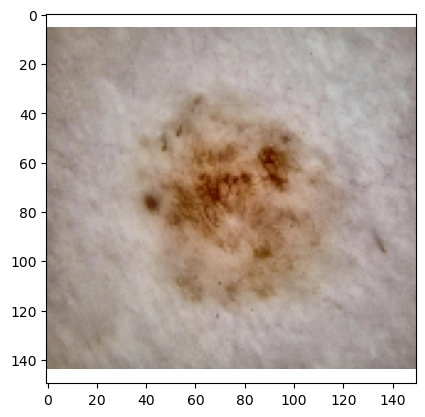

In [8]:
from matplotlib import pyplot as plt

im = pipeline.loader.get_element_by_id(0)[0]



plt.imshow(pipeline.loader.get_element_by_id(1585)[0])

In [9]:
im = pipeline.loader.get_element_by_id(1585)[0]

var = VarExtractor(color_space="rgb")
var.extract(im)

array([nan, nan, nan], dtype=float32)

In [10]:
a = pipeline.feature_matrix[np.isnan(pipeline.feature_matrix)]

np.where(np.isnan(pipeline.feature_matrix))

(array([ 1585,  1585,  1585,  1585,  1585,  1585,  1585,  1585,  1585,
        14451, 14451, 14451, 14451, 14451, 14451, 14451, 14451, 14451],
       dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64))

In [11]:
def predict_with_classifiers(self, new_dataset_path, percentage=100):
    """
    Predicts the output for a new dataset using all fitted classifiers and stores the results.

    Args:
    new_dataset_path: The path to the new dataset for prediction.

    Returns:
    A dictionary containing the predictions from all classifiers.
    """
    if not self.fitted_classifiers:
        raise RuntimeError("Classifiers must be fitted before making predictions.")

    if self.verbose:
        logger.info("Predicting with classifiers on dataset: %s", new_dataset_path)

    # Load and extract features from the new dataset
    new_loader = FactoryLoader(path=new_dataset_path, factory=self.loader.get_factory(), percentage=percentage)
    new_feature_matrix, new_labels = self.feature_strategy.run(new_loader.get_loader())

    # Store predictions in the class attribute
    self.predictions = {"GT": new_labels, }
    for clf_name, clf in self.fitted_classifiers.items():

        self.predictions[clf_name] = clf.predict(new_feature_matrix)
        if self.verbose:
            logger.info("Predictions made with classifier: %s", clf_name)

    return self.predictions


In [12]:
#rf1 = RandomForestClassifier(n_estimators=100)
#rf2 = RandomForestClassifier(n_estimators=150)
#rf3 = RandomForestClassifier(n_estimators=250)

# svm1 = SVC(kernel='linear', C=1)
# svm2 = SVC(kernel='linear', C=1.5)
# svm3 = SVC(kernel='linear', C=2)
# 
# svm6 = SVC(kernel='rbf', C=1)
# svm7 = SVC(kernel='rbf', C=1.5)
# svm8 = SVC(kernel='rbf', C=2)

xgb1 = XGBClassifier(n_estimators=250)
xgb2 = XGBClassifier(n_estimators=350)
xgb3 = XGBClassifier(n_estimators=450)

pipeline.classifiers = [
                        # rf1, rf2, rf3,
                        # svm1, svm2, svm3, svm6, svm7, svm8,
                        xgb1, xgb2, xgb3]

In [13]:
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: XGBClassifier0
INFO:utils.ml:Fitted classifier: XGBClassifier0; Done in 0.72908616065979 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier1
INFO:utils.ml:Fitted classifier: XGBClassifier1; Done in 0.9711806774139404 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier2
INFO:utils.ml:Fitted classifier: XGBClassifier2; Done in 1.2184741497039795 seconds
INFO:utils.ml:Fitting completed in 2.93 seconds.


In [14]:
pipeline.predict_with_classifiers(VAL_PATH)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val


Processed 5/159 batches.
Processed 10/159 batches.
Processed 15/159 batches.
Processed 20/159 batches.
Processed 25/159 batches.
Processed 30/159 batches.
Processed 35/159 batches.
Processed 40/159 batches.
Processed 45/159 batches.
Processed 50/159 batches.
Processed 55/159 batches.
Processed 60/159 batches.
Processed 65/159 batches.
Processed 70/159 batches.
Processed 75/159 batches.
Processed 80/159 batches.
Processed 85/159 batches.
Processed 90/159 batches.
Processed 95/159 batches.
Processed 100/159 batches.
Processed 105/159 batches.
Processed 110/159 batches.
Processed 115/159 batches.
Processed 120/159 batches.
Processed 125/159 batches.
Processed 130/159 batches.
Processed 135/159 batches.
Processed 140/159 batches.
Processed 145/159 batches.
Processed 150/159 batches.
Processed 155/159 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier0
INFO:utils.ml:Predictions made with classifier: XGBClassifier1
INFO:utils.ml:Predictions made with classifier: XGBClassifier2


Processed 159/159 batches.


{'GT': array([0, 0, 0, ..., 1, 1, 1]),
 'XGBClassifier0': array([0, 0, 1, ..., 1, 0, 1]),
 'XGBClassifier1': array([0, 0, 1, ..., 1, 0, 1]),
 'XGBClassifier2': array([0, 0, 1, ..., 1, 0, 1])}

In [1]:
pipeline.calculate_metrics()

NameError: name 'pipeline' is not defined

In [16]:
df = pd.DataFrame(data=pipeline.calculate_metrics())
df.T

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier0: {'accuracy': 0.8042676501580611, 'precision': 0.8043652662825713, 'recall': 0.8042676501580611, 'f1': 0.8042815748223928}
INFO:utils.ml:Metrics for classifier XGBClassifier1: {'accuracy': 0.8029504741833509, 'precision': 0.8029544217872976, 'recall': 0.8029504741833509, 'f1': 0.8029522250635208}
INFO:utils.ml:Metrics for classifier XGBClassifier2: {'accuracy': 0.8079557428872497, 'precision': 0.8079785039850969, 'recall': 0.8079557428872497, 'f1': 0.8079625814402241}


,accuracy,precision,recall,f1
GT,1.000000,1.000000,1.000000,1.000000
XGBClassifier0,0.804268,0.804365,0.804268,0.804282
XGBClassifier1,0.802950,0.802954,0.802950,0.802952
XGBClassifier2,0.807956,0.807979,0.807956,0.807963
